In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
plt.rcParams["figure.figsize"] = [21, 18]
import warnings
warnings.filterwarnings('ignore')

colors = ['rgb(0,31,63)', 'rgb(255,133,27)', 'rgb(255,65,54)', 'rgb(0,116,217)', 'rgb(133,20,75)', 'rgb(57,204,204)',
'rgb(240,18,190)', 'rgb(46,204,64)', 'rgb(1,255,112)', 'rgb(255,220,0)']

In [2]:
data, labels = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)

In [3]:
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
labels

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [5]:
X = data.values
y = labels.astype(np.int)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

X_standardized = StandardScaler().fit_transform(X)

X_normalized = Normalizer().fit_transform(X_standardized)

# Part - 1

In [7]:
# 1

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca2 = pca.fit_transform(X_normalized)

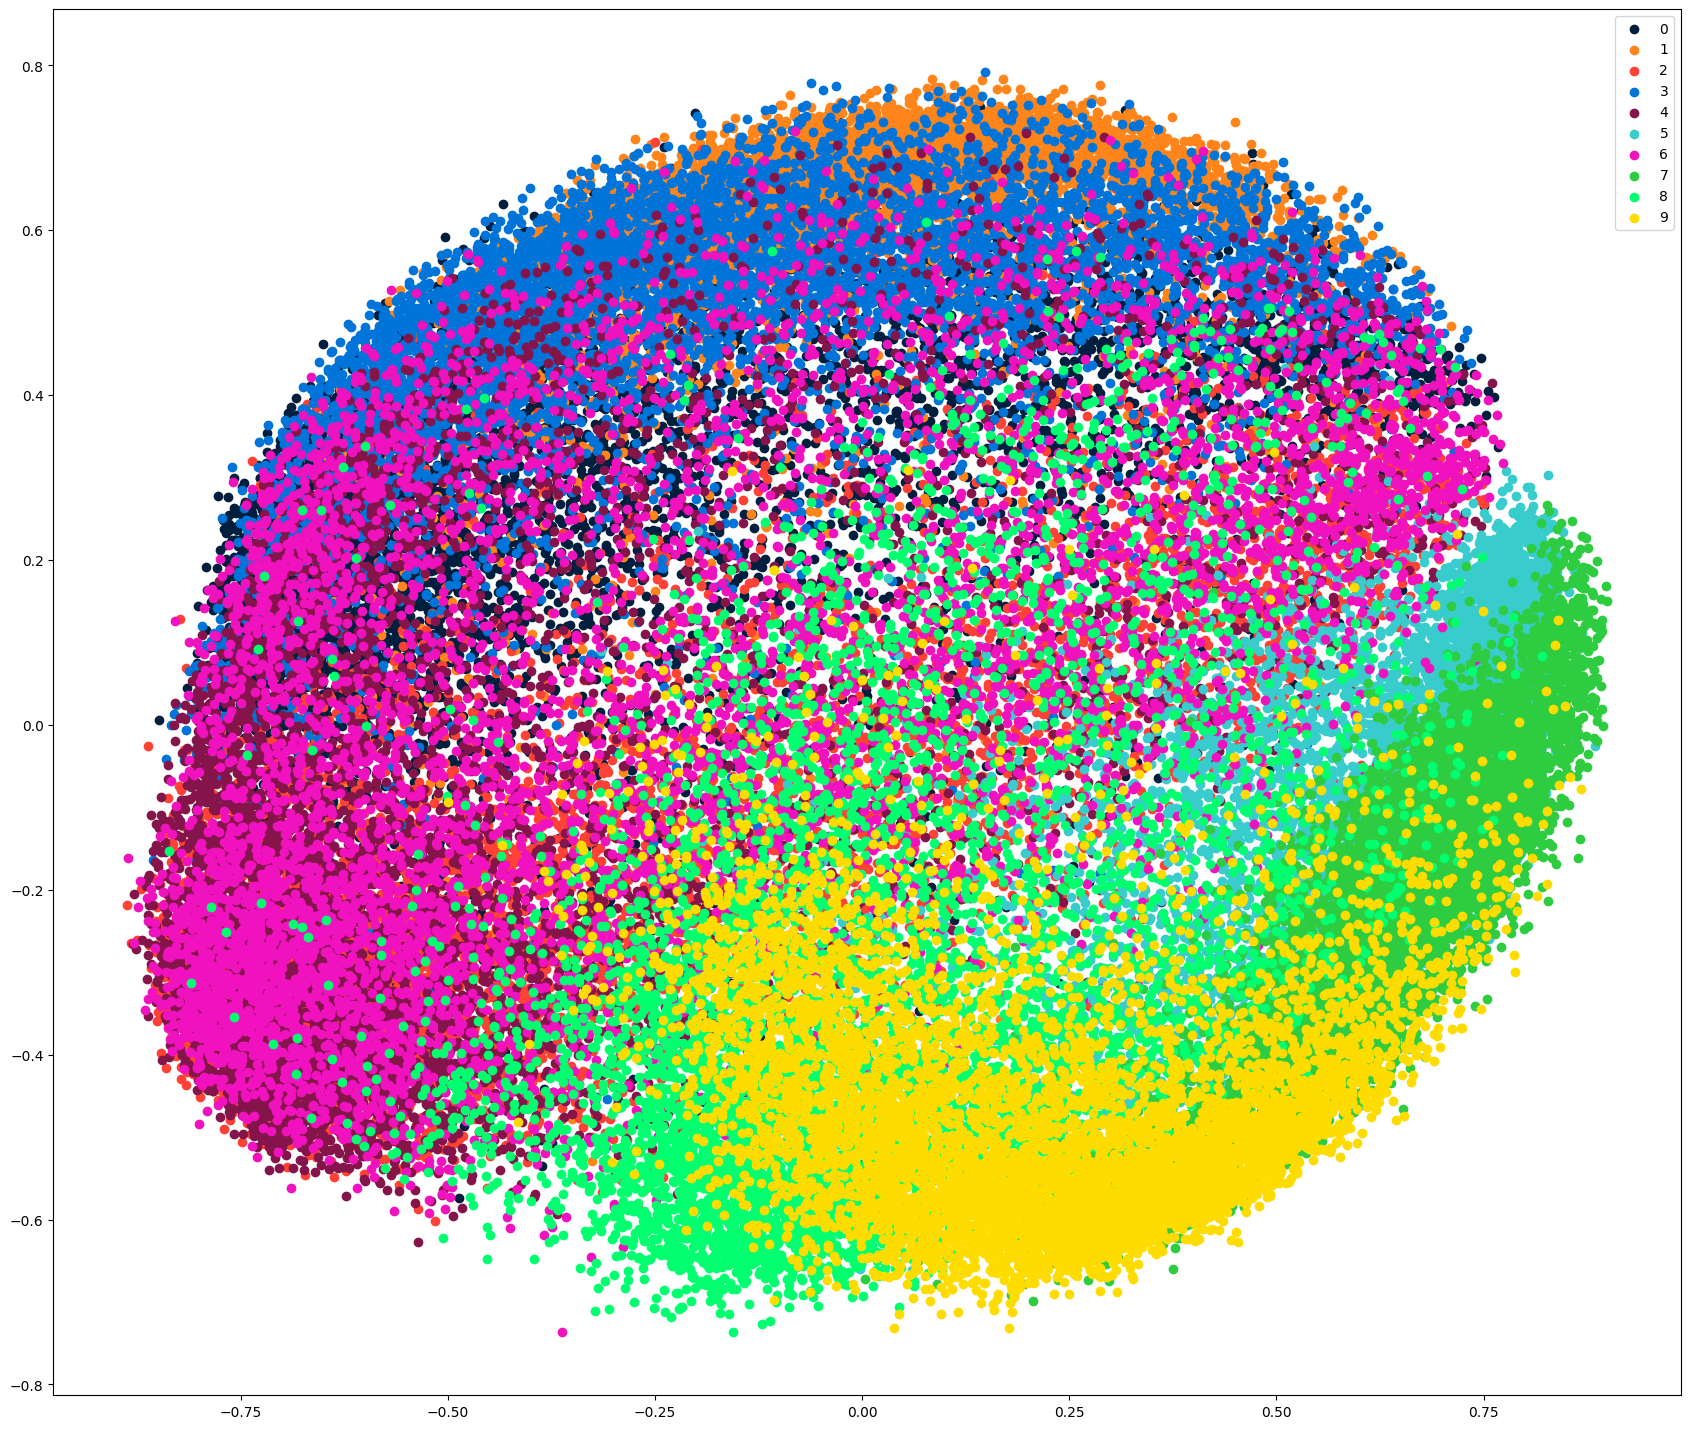

In [8]:
# 2
    
for k, i in enumerate(np.unique(y.astype(np.int))):
    plt.scatter(X_pca2[y == i, 0],
               X_pca2[y == i, 1],
               color = '#%02x%02x%02x' % literal_eval(colors[k][3:]), 
                label = str(i))
plt.legend()
plt.show()

In [9]:
# 3
print(pca.explained_variance_ratio_)

[0.23928753 0.1549548 ]


The first dimension explains 23.9% of the pixel data, the second dimension explains approximately 15.49% of the pixel data.

# part-2

In [10]:
#1

# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_lda = lda.fit_transform(X_normalized, y)

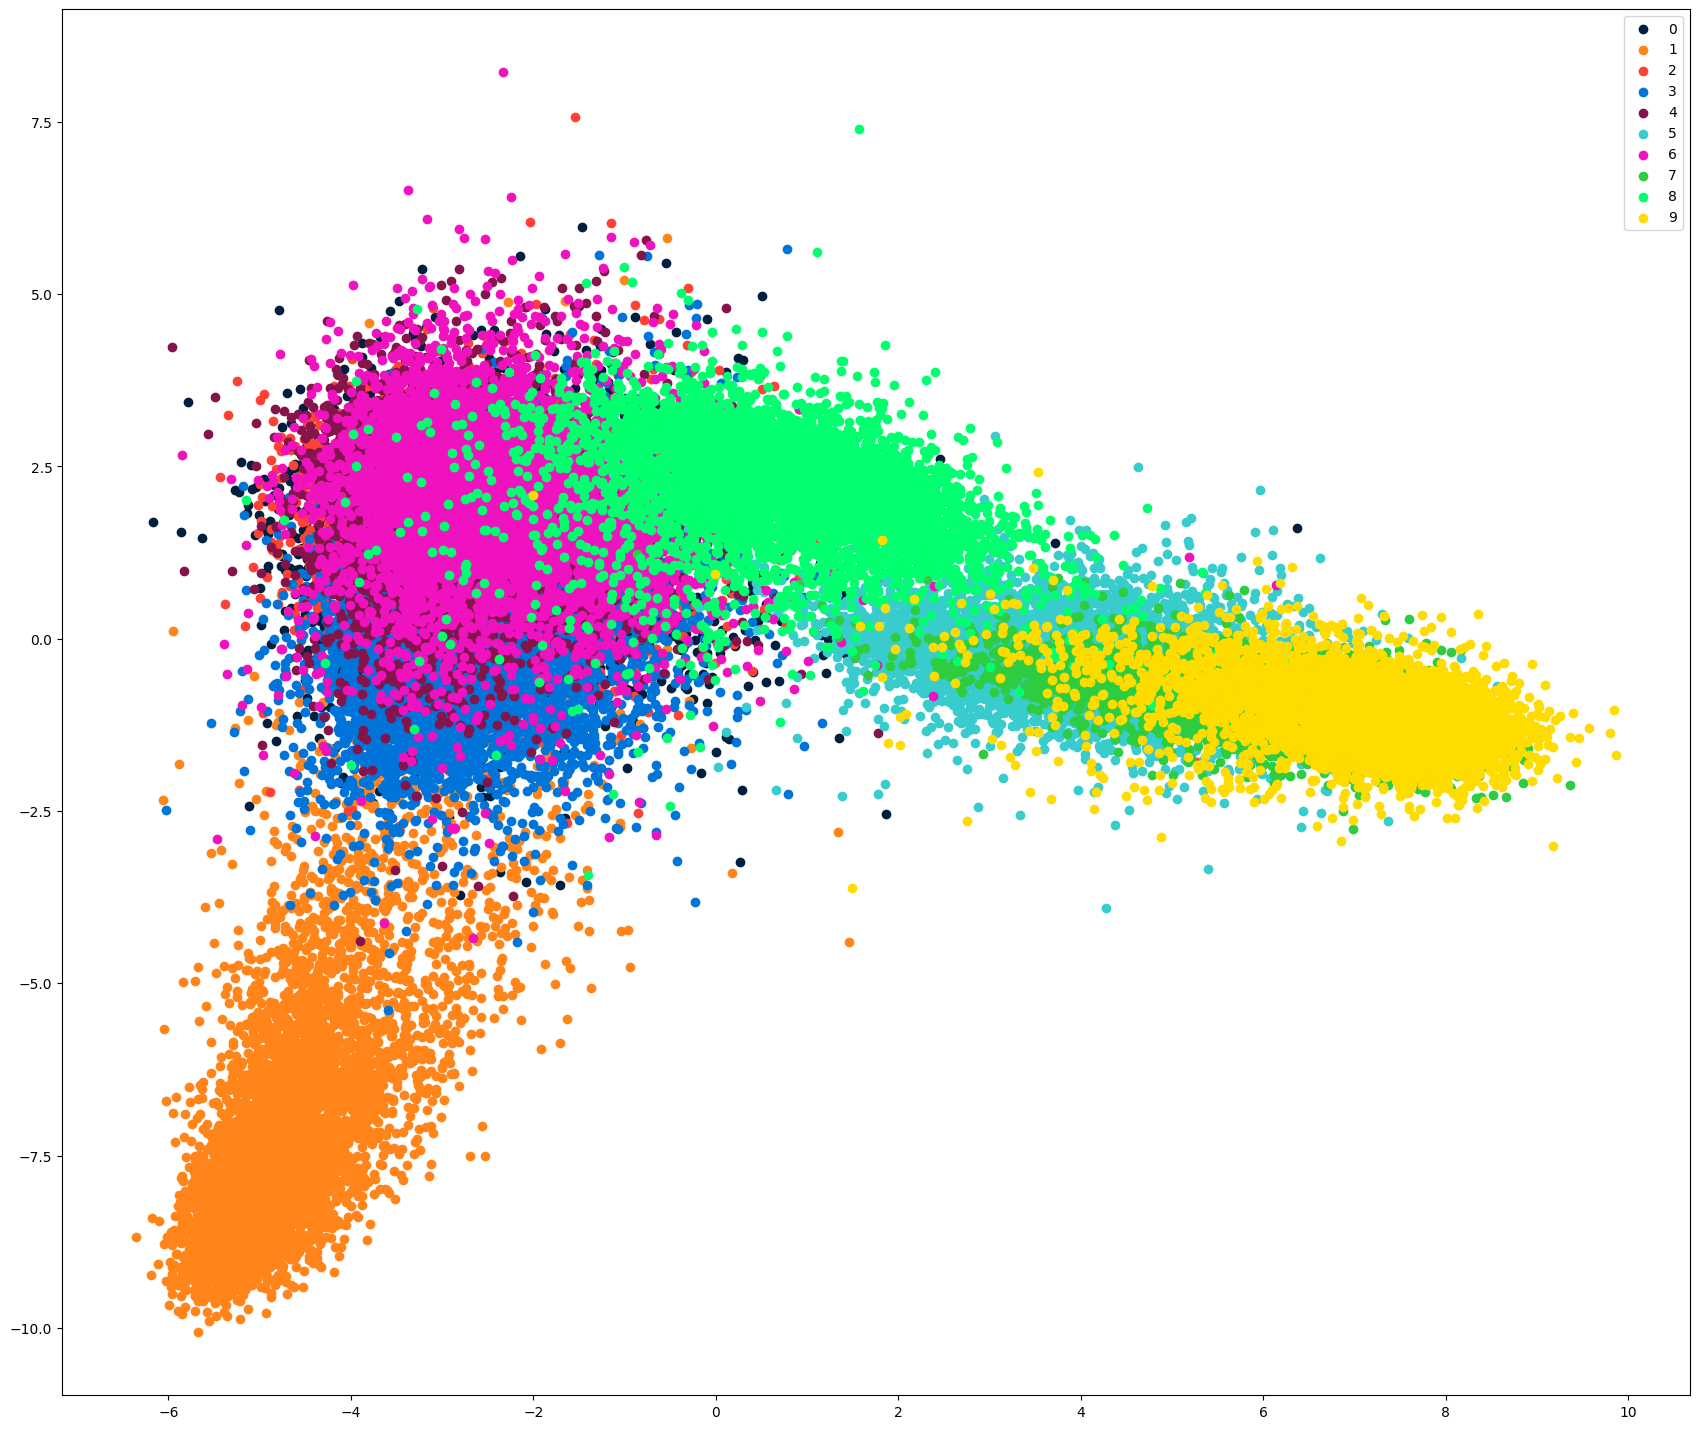

In [11]:
# 2

for k, i in enumerate(np.unique(y.astype(np.int))):
    plt.scatter(X_lda[y == i, 0],
               X_lda[y == i, 1],
               color = '#%02x%02x%02x' % literal_eval(colors[k][3:]), 
                label = str(i))
plt.legend()
plt.show()

In [12]:
# 3
lda.explained_variance_ratio_

array([0.48638734, 0.20742091])

The first dimension explains 48.6% of the pixel data, the second dimension explains approximately 20.74% of the pixel data.

# Part-3

1. Based on the explained variance ratio, LDA model performs better as it explains more of the pixel data in their first and second dimention as compared to PCA model.


2. As seen in the above scatter plots, LDA is better in separating different classes of data.

3. PCA is an unsupervised technique that focuses on capturing the maximum variance in the data. It seeks to find a set of orthogonal axes (principal components) along which the data exhibits the most variation.The principal components are ordered in terms of the amount of variance they capture, allowing for dimensionality reduction by selecting a subset of the components that explain the majority of the variance.

    On the other hand, LDA is a supervised technique that takes into account the class labels of the data. Its primary objective is to find a lower-dimensional representation that maximizes class separability. LDA aims to project the data onto a new subspace while maximizing the between-class scatter and minimizing the within-class scatter. 

    LDA works better in this case due to its underlying assumptions and objectives.One of the assumptions of LDA is that the data follows a Gaussian distribution. In the case of the Fashion MNIST dataset, which consists of grayscale images of clothing items, the pixel intensity values can be reasonably approximated by a Gaussian distribution. This assumption aligns with the characteristics of the dataset, making LDA a suitable choice.Additionally, LDA considers class labels during dimensionality reduction. by considering the class labels, LDA can potentially uncover meaningful patterns and reduce the dimensions in a way that enhances the separability between class labels.